#Porfilio Trujillo Martinez

###Taller 7

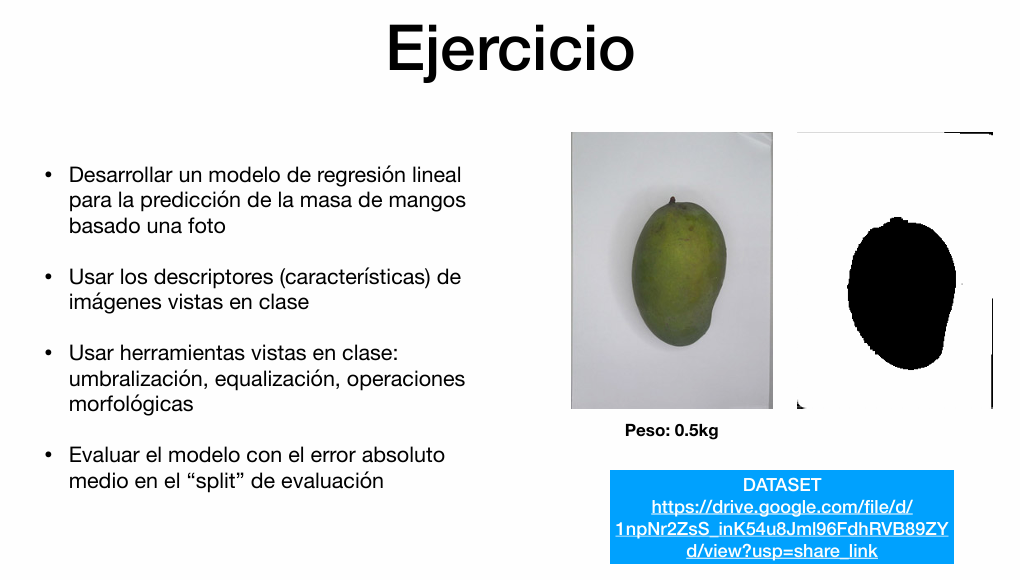

###Importar librerias

In [ ]:
!pip install opencv-python


In [ ]:
import os
import cv2
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from google.colab.patches import cv2_imshow


###Importar datos y ver las primeras 9 imageens

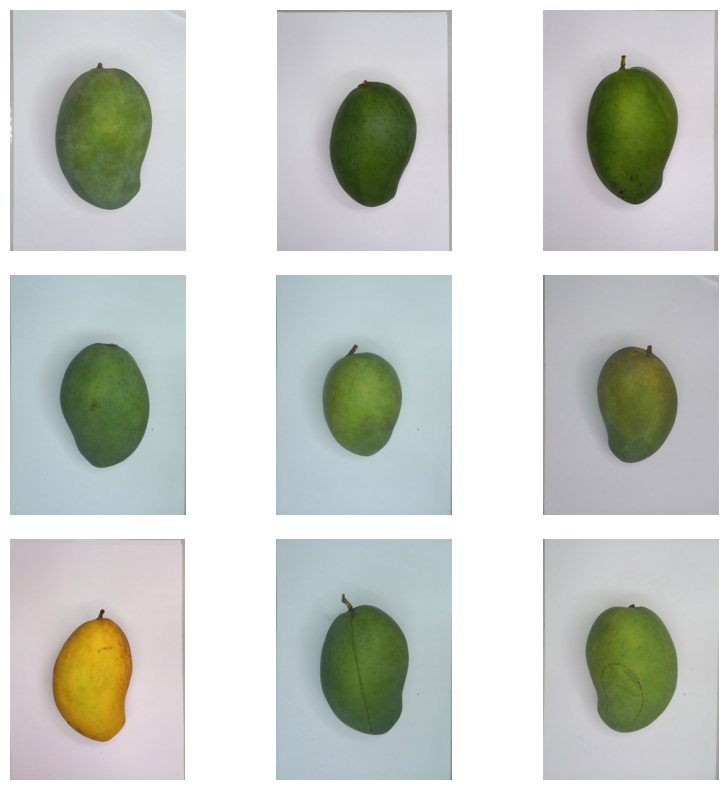

In [ ]:
carpeta_imagenes = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/images'
archivos = os.listdir(carpeta_imagenes)
archivos_imagen = [archivo for archivo in archivos if archivo.endswith('.jpg') or archivo.endswith('.png')]
archivos_imagen = archivos_imagen[:9]
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterar sobre las primeras 9 imágenes y mostrarlas
for i, nombre_archivo in enumerate(archivos_imagen):
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_archivo)
    imagen = mpimg.imread(ruta_imagen)
    fila = i // 3
    columna = i % 3
    axs[fila, columna].imshow(imagen)
    axs[fila, columna].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


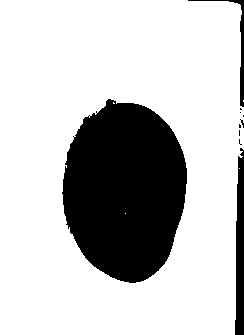

In [ ]:
from google.colab.patches import cv2_imshow
import cv2 as cv

# Leer la imagen en escala de grises
img = cv.imread('/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/images/100a.jpg', cv.IMREAD_GRAYSCALE)

# Aplicar el método de umbralización de Otsu
ret, th = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Mostrar la imagen resultante
cv2_imshow(th)


##Otsu en CV

In [ ]:
input_folder = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/images/'
output_folder = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/binary_images/'

# Asegurarse de que la carpeta de salida exista
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
file_list = os.listdir(input_folder)

# Iterar sobre cada archivo en la carpeta de entrada
for filename in file_list:
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        img = cv.imread(os.path.join(input_folder, filename), cv.IMREAD_GRAYSCALE)
        ret, th = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
        output_path = os.path.join(output_folder, filename)
        cv.imwrite(output_path, th)
print("Proceso completado.")


Proceso completado.


##Ver las primeras 9 imágenes

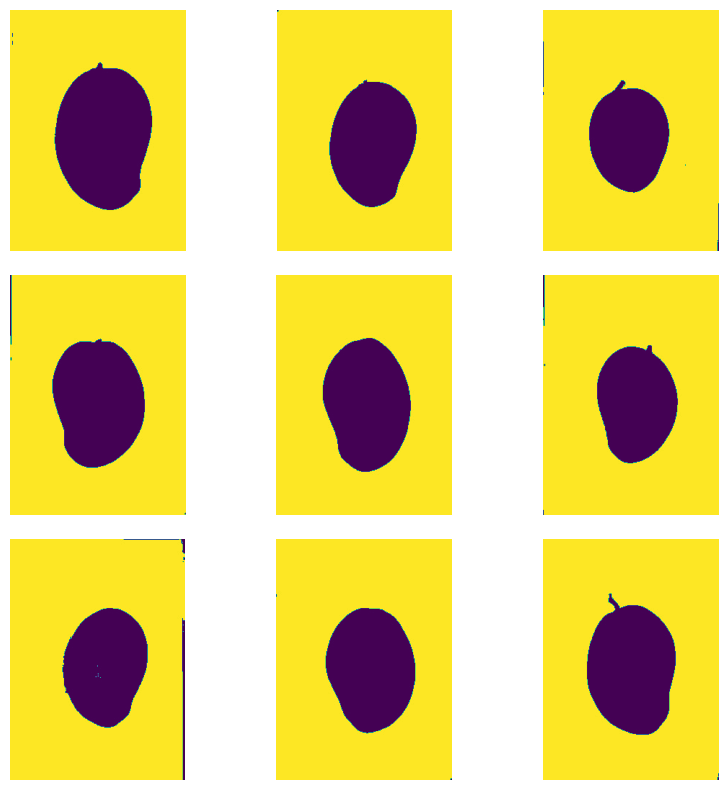

In [ ]:
carpeta_imagenes2 = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/binary_images/'
archivos = os.listdir(carpeta_imagenes2)
archivos_imagen = [archivo for archivo in archivos if archivo.endswith('.jpg') or archivo.endswith('.png')]
archivos_imagen = archivos_imagen[:9]
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# Iterar sobre las primeras 9 imágenes y mostrarlas
for i, nombre_archivo in enumerate(archivos_imagen):
    ruta_imagen = os.path.join(carpeta_imagenes2, nombre_archivo)
    imagen = mpimg.imread(ruta_imagen)
    fila = i // 3
    columna = i % 3
    axs[fila, columna].imshow(imagen)
    axs[fila, columna].axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()


##Ver la imagen de mayor y el menor tamaño

In [ ]:
directorio = carpeta_imagenes2
lista_archivos = os.listdir(directorio)
tamaños = []

# Iterar sobre cada archivo de imagen en el directorio
for archivo in lista_archivos:
    ruta = os.path.join(directorio, archivo)
    imagen = cv2.imread(ruta)
    tamaño = imagen.shape[:2]
    tamaños.append((archivo, tamaño))

tamaños_ordenados = sorted(tamaños, key=lambda x: x[1][0] * x[1][1])
imagen_menor = tamaños_ordenados[0]
imagen_mayor = tamaños_ordenados[-1]
print(f"La imagen {imagen_menor[0]} tiene de ancho {imagen_menor[1][1]} x {imagen_menor[1][0]} de alto.")
print(f"La imagen {imagen_mayor[0]} tiene de ancho {imagen_mayor[1][1]}  x {imagen_mayor[1][0]} de alto.")


La imagen 211b.jpg tiene de ancho 243 x 335 de alto.
La imagen 55a.jpg tiene de ancho 244  x 335 de alto.


##Hu Moments

In [ ]:
# Función para calcular los momentos de Hu
def calcular_hu_moments(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    M = cv2.moments(gray)
    hu = cv2.HuMoments(M)
    return hu.flatten()

In [ ]:
nombres_imagenes = []
momentos_hu = []

# Iterar sobre cada archivo en la carpeta
for filename in os.listdir(carpeta_imagenes2):

    # Comprobar si el archivo es una imagen
    if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
        image = cv2.imread(os.path.join(carpeta_imagenes2, filename))
        hu = calcular_hu_moments(image)
        nombres_imagenes.append(filename)
        momentos_hu.append(hu)

data = {'NombreImagen': nombres_imagenes}
for i in range(6):
    data[f'Hu{i+1}'] = [hu[i] for hu in momentos_hu]

df = pd.DataFrame(data)
df.to_csv('resultados_moments_hu3.csv', index=False)

#-------------------------------------------------------------------------------
print("Primeros 5 registros:")
df.head(5)

Primeros 5 registros:


,NombreImagen,Hu1,Hu2,Hu3,Hu4,Hu5,Hu6
0,7a.jpg,0.001154,1.213664e-07,4.348553e-13,3.542839e-12,2.007510e-24,3.827296e-16
1,211b.jpg,0.001016,9.765747e-08,7.323336e-13,4.645719e-12,6.308447e-24,8.648386e-16
2,179b.jpg,0.000938,8.329980e-08,1.497622e-13,7.423065e-13,2.404602e-25,1.938682e-16
3,134a.jpg,0.001067,1.061215e-07,8.896245e-14,1.920138e-12,7.429072e-25,6.232065e-16
4,60b.jpg,0.001046,9.837591e-08,3.573911e-13,2.909314e-12,2.641303e-24,7.898269e-16


In [ ]:
peso_mango_xlsx = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/Harumanis_mango_weight_grade.xlsx'
df = pd.read_excel(peso_mango_xlsx)

# Mostrar los primeros 5 registros del DataFrame
print("Primeros 5 registros:")
print(df.head())

# Mostrar información sobre el DataFrame
print("\nInformación del DataFrame:")
print(df.info())


Primeros 5 registros:
  NombreImagen Color_K-Yellow_P_Green Fruit Grade  Mass(kg)
0       1a.jpg                      P           2      0.50
1       2a.jpg                      P           2      0.50
2       3a.jpg                      P           2      0.35
3       4a.jpg                      P           2      0.45
4       5a.jpg                      P           2      0.50

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NombreImagen            548 non-null    object 
 1   Color_K-Yellow_P_Green  548 non-null    object 
 2   Fruit Grade             548 non-null    object 
 3   Mass(kg)                548 non-null    float64
dtypes: float64(1), object(3)
memory usage: 17.2+ KB
None


##Hacer la concatenación de el peso y los momentos

In [ ]:
ruta_csv1 = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/Harumanis_mango_weight_grade.xlsx'
ruta_csv2 = '/content/resultados_moments_hu3.csv'

df1 = pd.read_excel(ruta_csv1)
df2 = pd.read_csv(ruta_csv2)
df_concatenado = pd.merge(df1, df2, on='NombreImagen', how='inner')

ruta_concatenado_excel = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/dataset_concatenado.xlsx'
df_concatenado.to_excel(ruta_concatenado_excel, index=False)
print("El DataFrame concatenado se ha guardado correctamente en el archivo:", ruta_concatenado_excel)


El DataFrame concatenado se ha guardado correctamente en el archivo: /content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/dataset_concatenado.xlsx


##Ver dataset concatenado

In [ ]:
peso_mango_xlsx = '/content/drive/MyDrive/Clase Visión Computo/7-slides/MangoMass/dataset_concatenado.xlsx'
df = pd.read_excel(peso_mango_xlsx)

print("Primeros 5 registros:")
df.head(5)


Primeros 5 registros:


,NombreImagen,Color_K-Yellow_P_Green,Fruit Grade,Mass(kg),Hu1,Hu2,Hu3,Hu4,Hu5,Hu6
0,1a.jpg,P,2,0.50,0.001012,9.474167e-08,8.907204e-14,5.711571e-13,-1.045386e-25,-1.359976e-16
1,2a.jpg,P,2,0.50,0.001004,9.573830e-08,2.140831e-13,6.169370e-13,-2.227072e-25,-1.907235e-16
2,3a.jpg,P,2,0.35,0.000937,8.467699e-08,6.922928e-13,1.720274e-12,1.206880e-24,2.561187e-16
3,4a.jpg,P,2,0.45,0.000960,8.831109e-08,2.933174e-13,1.413618e-12,6.704954e-25,1.718478e-16
4,5a.jpg,P,2,0.50,0.001011,9.804311e-08,5.096943e-13,2.043428e-12,-1.613454e-24,-5.342465e-16


In [ ]:
# Mostrar los primeros  5 registros del DataFrame
#print("Primeros 5 registros:")
#print(df.head())

# Mostrar información sobre el DataFrame
#print("\nInformación del DataFrame:")
#print(df.info())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##Eliminar variables categóricas

In [ ]:
df_concatenado = df.drop(columns=['NombreImagen','Color_K-Yellow_P_Green','Fruit Grade'])

##Hacer separación de datos

In [ ]:
X = df_concatenado.drop(columns=['Mass(kg)'])  # Variables independientes
y = df_concatenado['Mass(kg)']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir los valores de y (variable objetivo) usando los datos de prueba
y_pred = modelo.predict(X_test)
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
print("Primeros 5 registros:")
print(y_pred_df.head())

Primeros 5 registros:
          0
0  0.447554
1  0.400373
2  0.393310
3  0.370883
4  0.391663


In [ ]:
# Calcular el error cuadrático medio (MSE) entre las predicciones y los valores reales
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

# Calcular el coeficiente de determinación R^2
r2 = modelo.score(X_test, y_test)
print(f'Coeficiente de determinación (R^2): {r2}')


Error cuadrático medio (MSE): 0.002220124414876467
Coeficiente de determinación (R^2): 0.694482924438117
